In [8]:
# Install the required packages
! pip install pandas matplotlib numpy

# Suppress depreciation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Import the required modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import helper_functions

### Read segment level data from forest treefile generated using treeinfo

In [9]:
tree_segments_df = helper_functions.treeinfo_attributes_segment('../data/Mak1_clipped_raycloud_inside_trees_info.txt')
tree_segments_df

tree_id        x        y        z  radius  parent_id  section_id  \
1            1 -15.7655   4.3449   2.1161  0.0702        0.0        99.0   
2            1 -15.5967   4.2829   2.3560  0.0702        1.0       198.0   
3            1 -15.6246   4.3006   2.7519  0.0702        2.0       314.0   
4            1 -15.6376   4.2810   3.1270  0.0702        3.0       422.0   
5            1 -15.6456   4.2841   3.4690  0.0702        4.0       530.0   
...        ...      ...      ...      ...     ...        ...         ...   
72156       99   4.4300  10.9925  12.2700  0.0030      325.0     53488.0   
72157       99   3.8700  10.6750  12.4600  0.0023      326.0     54513.0   
72158       99   3.7700  10.7750  12.4250  0.0021      327.0     55505.0   
72159       99   3.8433  10.6567  12.4800  0.0023      329.0     55506.0   
72160       99   3.8250  10.6450  12.4650  0.0022      331.0     56458.0   

       volume  diameter   length  strength  min_strength  dominance  angle  \
1      0.0079    0.1404  13.5328    0.0169        0.0169        0.0    0.0   
2      0.0046    0.1404  13.0214    0.0176        0.0169        0.0    0.0   
3      0.0062    0.1404  12.7216    0.0180        0.0169        0.0    0.0   
4      0.0058    0.1404  12.3243    0.0186        0.0169        0.0    0.0   
5      0.0053    0.1404  11.9485    0.0192        0.0169        0.0    0.0   
...       ...       ...      ...       ...           ...        ...    ...   
72156  0.0000    0.0060   1.0623    0.0203        0.0166        0.0    0.0   
72157  0.0000    0.0046   1.0929    0.0162        0.0152        0.0    0.0   
72158  0.0000    0.0042   1.0443    0.0158        0.0154        0.0    0.0   
72159  0.0000    0.0046   1.0644    0.0166        0.0152        0.0    0.0   
72160  0.0000    0.0044   1.0264    0.0166        0.0152        0.0    0.0   

       children  
1           1.0  
2           1.0  
3           1.0  
4           1.0  
5           1.0  
...         ...  
72156       0.0  
72157       1.0  
72158       0.0  
72159       1.0  
72160       0.0  

[72062 rows x 15 columns]

In [14]:
filtered_tree_segments_df = tree_segments_df[tree_segments_df['tree_id'] == 24]
filtered_tree_segments_df

tree_id       x       y        z  radius  parent_id  section_id  \
16004       24 -5.4457  9.6316   2.6198  0.0582        0.0       122.0   
16005       24 -5.4335  9.6305   2.8564  0.0582        1.0       223.0   
16006       24 -5.4320  9.6276   3.0871  0.0582        2.0       340.0   
16007       24 -5.4389  9.6249   3.3044  0.0582        3.0       448.0   
16008       24 -5.4435  9.6246   3.5118  0.0582        4.0       556.0   
...        ...     ...     ...      ...     ...        ...         ...   
16297       24 -5.3033  9.4867  14.8900  0.0066      293.0     64116.0   
16298       24 -5.3175  9.5175  14.8975  0.0061      294.0     64693.0   
16299       24 -5.3200  9.5625  14.8950  0.0061      295.0     65246.0   
16300       24 -5.3325  9.6000  14.9275  0.0056      296.0     65767.0   
16301       24 -5.3220  9.6380  14.9380  0.0050      297.0     66274.0   

       volume  diameter   length  strength  min_strength  dominance  angle  \
16004  0.0116    0.1164  15.3141    0.0130         0.013        0.0    0.0   
16005  0.0025    0.1164  14.2242    0.0140         0.013        0.0    0.0   
16006  0.0025    0.1164  13.9873    0.0142         0.013        0.0    0.0   
16007  0.0023    0.1164  13.7566    0.0145         0.013        0.0    0.0   
16008  0.0022    0.1164  13.5391    0.0147         0.013        0.0    0.0   
...       ...       ...      ...       ...           ...        ...    ...   
16297  0.0000    0.0132   1.2063    0.0323         0.013        0.0    0.0   
16298  0.0000    0.0122   1.1718    0.0313         0.013        0.0    0.0   
16299  0.0000    0.0122   1.1371    0.0323         0.013        0.0    0.0   
16300  0.0000    0.0112   1.0920    0.0315         0.013        0.0    0.0   
16301  0.0000    0.0100   1.0408    0.0304         0.013        0.0    0.0   

       children  
16004       1.0  
16005       1.0  
16006       1.0  
16007       1.0  
16008       1.0  
...         ...  
16297       1.0  
16298       1.0  
16299       1.0  
16300       1.0  
16301       0.0  

[298 rows x 15 columns]

### Plot the mean volume by height with bins of 1 meter for the forest

In [12]:
# Normalize 'z' values to start from 0
segment_df.loc[:, 'z_normalized'] = segment_df['z'] - segment_df['z'].min()

# Round the normalized 'z' values to the nearest meter
segment_df.loc[:, 'z_rounded'] = np.round(segment_df['z_normalized'])

# Group by the rounded normalized height ('z_rounded') and calculate the mean volume for each bin
mean_volume_by_height = segment_df.groupby('z_rounded')['volume'].mean()

# Plot the mean volume by height with bins of 1 meter
plt.figure(figsize=(10, 8))
plt.plot(mean_volume_by_height.values, mean_volume_by_height.index, linestyle='-')

# Add labels and title
plt.ylabel('Height (m)')
plt.xlabel('Mean Segment Volume [m^3]')
plt.title('Mean Segment Volume by Height (1m bins)')

# Show the plot
plt.grid(True)
plt.show()


NameError: name 'segment_df' is not defined

### Plot the mean segment volume by height with bins of 1 meter for a single tree

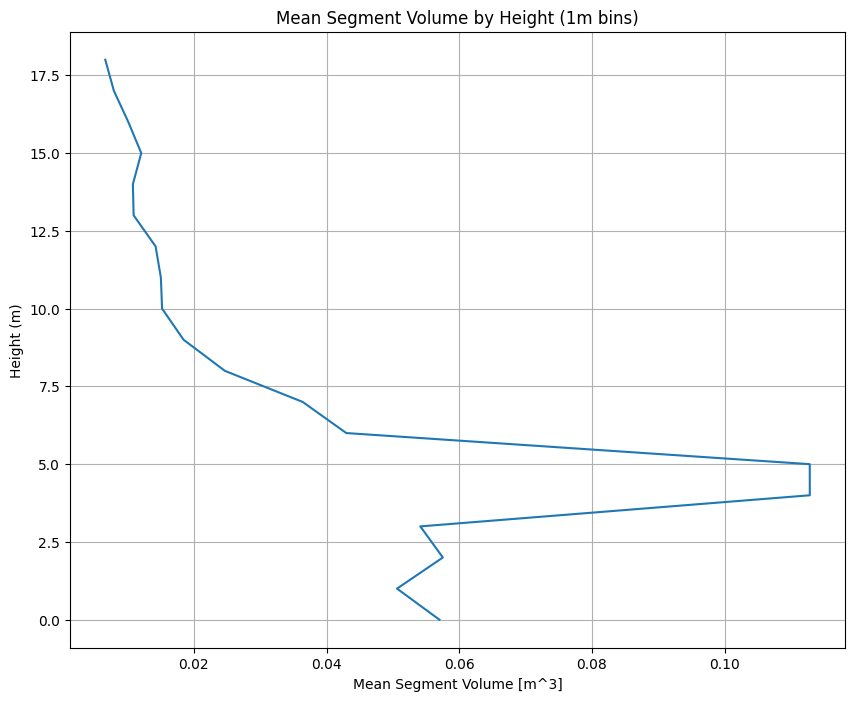

In [ ]:
# Select a single tree from the segment dataframe
segment_df_single = segment_df.loc[segment_df['tree_id'] == 22]

# Normalize 'z' values to start from 0
segment_df_single.loc[:, 'z_normalized'] = segment_df_single['z'] - segment_df_single['z'].min()

# Round the normalized 'z' values to the nearest meter
segment_df_single.loc[:, 'z_rounded'] = np.round(segment_df_single['z_normalized'])

# Group by the rounded normalized height ('z_rounded') and calculate the mean volume for each bin
mean_volume_by_height = segment_df_single.groupby('z_rounded')['radius'].mean()

# Plot the mean volume by height with bins of 1 meter
plt.figure(figsize=(10, 8))
plt.plot(mean_volume_by_height.values, mean_volume_by_height.index, linestyle='-')

# Add labels and title
plt.ylabel('Height (m)')
plt.xlabel('Mean Segment Volume [m^3]')
plt.title('Mean Segment Volume by Height (1m bins)')

# Show the plot
plt.grid(True)
plt.show()


### Read in tree level data from forest treefile generated using treeinfo

In [ ]:
tree_info_df = treefiles.treeinfo_attributes_tree('example_data/raycloud_trees_info.txt')
tree_info_df

tree_id    height  crown_radius  dimension  monocotal       DBH      bend  \
0         1   8.19910       0.60945   1.372790   0.514423  0.076986  0.008085   
1         2   9.89800       1.28990   1.303530   0.576129  0.071055  0.007163   
2         3   2.85950       0.51510   0.000000   0.000000  0.066182  0.028812   
3         4   4.48045       0.37865   1.002350   0.759317  0.072536  0.007002   
4         5  18.60220       7.00425   1.718130   0.390366  0.208286  0.026788   
..      ...       ...           ...        ...        ...       ...       ...   
82       83   2.58710       0.17240   1.341980   0.367468  0.064561  0.012963   
83       84   6.95837       0.77415   0.782092   0.762133  0.049896  0.016630   
84       85   0.63630       0.65380   0.000000   0.000000  0.000000  0.140457   
85       86   0.76517       0.70720   0.000000   0.000000  0.000000  0.095156   
86       87   0.56084       0.99200   0.000000   0.000000  0.000000  0.121327   

    branch_slope  
0       1.031810  
1       0.896524  
2       0.501056  
3       0.875555  
4       0.806005  
..           ...  
82      1.483380  
83      1.231680  
84      0.841817  
85      0.000000  
86      0.000000  

[87 rows x 8 columns]

### Read tree level locations from treefile generated from rayextract trees

In [ ]:
tree_df = treefiles.attributes_tree('example_data/raycloud_trees.txt')
tree_df

tree_id        x        y        z    radius  parent_id  section_id
0            1  38.6897 -61.7028 -2.04325  0.038493       -1.0         0.0
135          2  37.8070 -54.0341 -2.12625  0.035679       -1.0         1.0
318          3  37.5191 -40.9895 -2.00850  0.033091       -1.0         2.0
353          4  38.9626 -60.1962 -2.05625  0.037519       -1.0         3.0
397          5  40.1087 -58.0372 -1.95125  0.104143       -1.0         4.0
...        ...      ...      ...      ...       ...        ...         ...
21827       83  56.8293 -39.7131 -2.24175  0.040271       -1.0        82.0
21858       84  58.9027 -61.1757 -1.93200  0.024948       -1.0        83.0
21938       85  45.2678 -39.2845 -2.12650  0.014909       -1.0        84.0
21993       86  45.2767 -39.0014 -2.21700  0.013027       -1.0        85.0
22024       87  49.8967 -42.7474 -2.22925  0.012503       -1.0        86.0

[87 rows x 7 columns]

### Join dataframes  

In [ ]:
# Join the tree_info_df and tree_df dataframes on the 'tree_id' column
tree_merged_df = tree_info_df.merge(tree_df, on='tree_id')
tree_merged_df

tree_id    height  crown_radius  dimension  monocotal       DBH      bend  \
0         1   8.19910       0.60945   1.372790   0.514423  0.076986  0.008085   
1         2   9.89800       1.28990   1.303530   0.576129  0.071055  0.007163   
2         3   2.85950       0.51510   0.000000   0.000000  0.066182  0.028812   
3         4   4.48045       0.37865   1.002350   0.759317  0.072536  0.007002   
4         5  18.60220       7.00425   1.718130   0.390366  0.208286  0.026788   
..      ...       ...           ...        ...        ...       ...       ...   
82       83   2.58710       0.17240   1.341980   0.367468  0.064561  0.012963   
83       84   6.95837       0.77415   0.782092   0.762133  0.049896  0.016630   
84       85   0.63630       0.65380   0.000000   0.000000  0.000000  0.140457   
85       86   0.76517       0.70720   0.000000   0.000000  0.000000  0.095156   
86       87   0.56084       0.99200   0.000000   0.000000  0.000000  0.121327   

    branch_slope        x        y        z    radius  parent_id  section_id  
0       1.031810  38.6897 -61.7028 -2.04325  0.038493       -1.0         0.0  
1       0.896524  37.8070 -54.0341 -2.12625  0.035679       -1.0         1.0  
2       0.501056  37.5191 -40.9895 -2.00850  0.033091       -1.0         2.0  
3       0.875555  38.9626 -60.1962 -2.05625  0.037519       -1.0         3.0  
4       0.806005  40.1087 -58.0372 -1.95125  0.104143       -1.0         4.0  
..           ...      ...      ...      ...       ...        ...         ...  
82      1.483380  56.8293 -39.7131 -2.24175  0.040271       -1.0        82.0  
83      1.231680  58.9027 -61.1757 -1.93200  0.024948       -1.0        83.0  
84      0.841817  45.2678 -39.2845 -2.12650  0.014909       -1.0        84.0  
85      0.000000  45.2767 -39.0014 -2.21700  0.013027       -1.0        85.0  
86      0.000000  49.8967 -42.7474 -2.22925  0.012503       -1.0        86.0  

[87 rows x 14 columns]

In [ ]:
# save to csv
tree_merged_df.to_csv('example_data/raycloud_trees.csv', index=False)

### Plot crown radius by DBH for trees with DBH over 10cm

In [ ]:
# Get DBH over 10cm
tree_merged_df_filtered = tree_merged_df[tree_merged_df['DBH'] > 0.1]

# Set figure size
plt.figure(figsize=(10, 8))

# Create scatter plot
plt.scatter(tree_merged_df_filtered['crown_radius'], tree_merged_df_filtered['DBH'])

# Add grid lines
plt.grid(True)

# Add labels and title
plt.xlabel('Crown Radius [m]')
plt.ylabel('DBH [m]')
plt.title('Crown Radius by DBH')

# Show the plot
plt.show()

In [ ]:
# Set figure size
plt.figure(figsize=(10, 8))

# Create scatter plot
plt.scatter(tree_merged_df_filtered['DBH'], tree_merged_df_filtered['height'])

# Add grid lines
plt.grid(True)

# Add labels and title
plt.xlabel('DBH [m]')
plt.ylabel('Height [m]')
plt.title('Height by DBH')

# Show the plot
plt.show()

### Plot tree locations and stem diameter

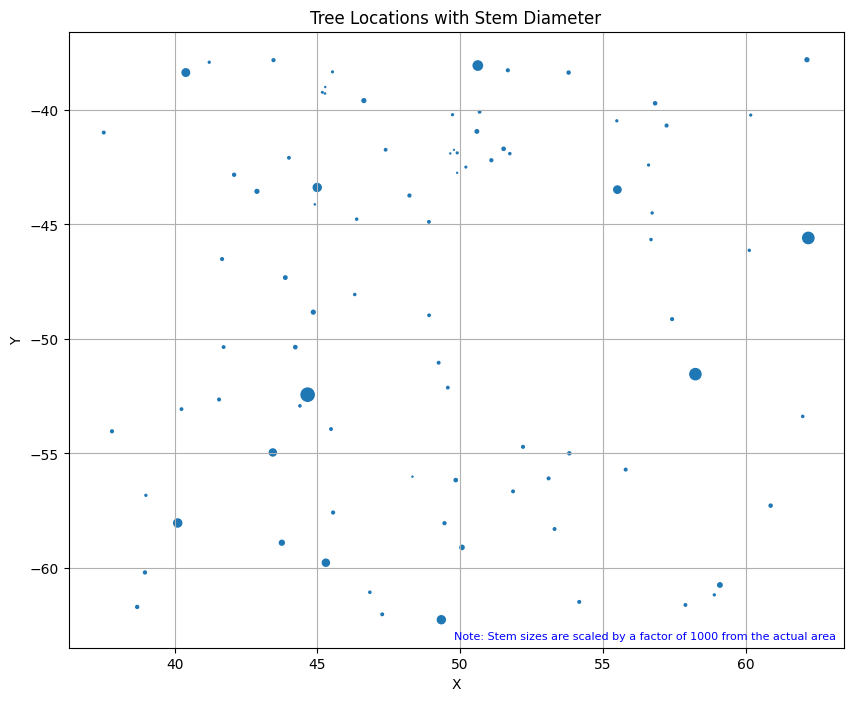

In [ ]:
plt.figure(figsize=(10, 8))

tree_merged_df['stem_area'] = np.pi * (tree_merged_df['radius'] ** 2)
scatter = plt.scatter(tree_merged_df['x'], tree_merged_df['y'], s=tree_merged_df['stem_area'] * 1000)

# This is an example text, adjust the placement and text as needed
plt.text(0.99, 0.01, 'Note: Stem sizes are scaled by a factor of 1000 from the actual area',
         verticalalignment='bottom', horizontalalignment='right',
         transform=plt.gca().transAxes,  # This aligns the text to the axes
         color='blue', fontsize=8)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Tree Locations with Stem Diameter')
plt.grid(True)

plt.show()

In [ ]:
tree_merged_df

tree_id    height  crown_radius  dimension  monocotal       DBH      bend  \
0         1   8.19910       0.60945   1.372790   0.514423  0.076986  0.008085   
1         2   9.89800       1.28990   1.303530   0.576129  0.071055  0.007163   
2         3   2.85950       0.51510   0.000000   0.000000  0.066182  0.028812   
3         4   4.48045       0.37865   1.002350   0.759317  0.072536  0.007002   
4         5  18.60220       7.00425   1.718130   0.390366  0.208286  0.026788   
..      ...       ...           ...        ...        ...       ...       ...   
82       83   2.58710       0.17240   1.341980   0.367468  0.064561  0.012963   
83       84   6.95837       0.77415   0.782092   0.762133  0.049896  0.016630   
84       85   0.63630       0.65380   0.000000   0.000000  0.000000  0.140457   
85       86   0.76517       0.70720   0.000000   0.000000  0.000000  0.095156   
86       87   0.56084       0.99200   0.000000   0.000000  0.000000  0.121327   

    branch_slope        x        y        z    radius  parent_id  section_id  \
0       1.031810  38.6897 -61.7028 -2.04325  0.038493       -1.0         0.0   
1       0.896524  37.8070 -54.0341 -2.12625  0.035679       -1.0         1.0   
2       0.501056  37.5191 -40.9895 -2.00850  0.033091       -1.0         2.0   
3       0.875555  38.9626 -60.1962 -2.05625  0.037519       -1.0         3.0   
4       0.806005  40.1087 -58.0372 -1.95125  0.104143       -1.0         4.0   
..           ...      ...      ...      ...       ...        ...         ...   
82      1.483380  56.8293 -39.7131 -2.24175  0.040271       -1.0        82.0   
83      1.231680  58.9027 -61.1757 -1.93200  0.024948       -1.0        83.0   
84      0.841817  45.2678 -39.2845 -2.12650  0.014909       -1.0        84.0   
85      0.000000  45.2767 -39.0014 -2.21700  0.013027       -1.0        85.0   
86      0.000000  49.8967 -42.7474 -2.22925  0.012503       -1.0        86.0   

    stem_area  
0    0.004655  
1    0.003999  
2    0.003440  
3    0.004422  
4    0.034073  
..        ...  
82   0.005095  
83   0.001955  
84   0.000698  
85   0.000533  
86   0.000491  

[87 rows x 15 columns]

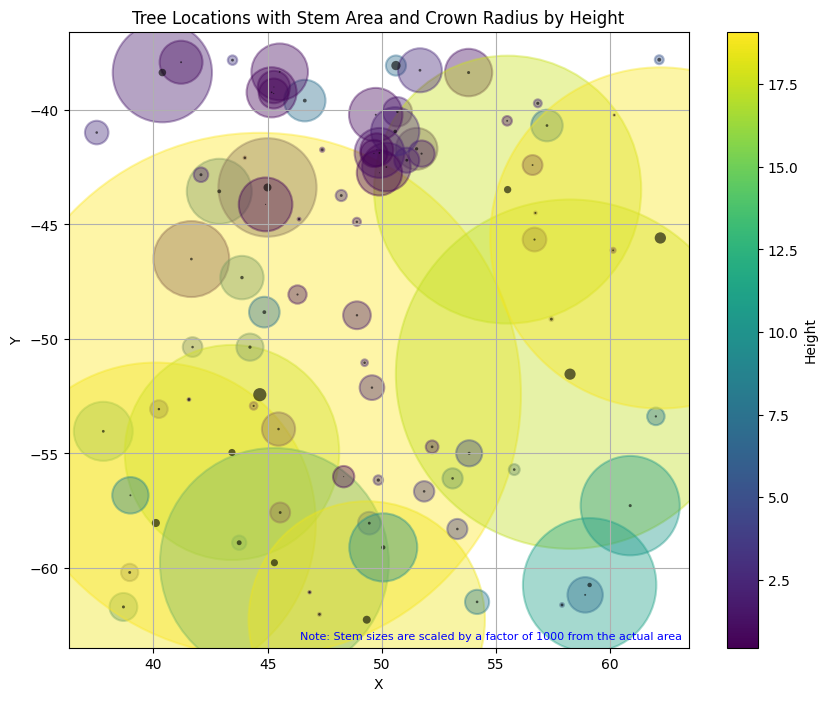

In [ ]:
### Plotting the tree locations with stem diameter and crown radius
import matplotlib.colors as mcolors

# Setup the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Define the colormap for the crown radius circles
cmap = plt.cm.viridis

# Normalize the height column for the colormap to color the crown radius circles by tree height
norm = mcolors.Normalize(vmin=tree_merged_df['height'].min(), vmax=tree_merged_df['height'].max())


# Adding circles to represent crown radius, colored by height
for idx, row in tree_merged_df.iterrows():
    color = cmap(norm(row['height']))  # Determine circle color based on tree height
    crown_circle = plt.Circle((row['x'], row['y']), row['crown_radius'], color=color, fill=True, alpha=0.4, linewidth=1.5)
    ax.add_artist(crown_circle)
# Plotting tree locations with stem area as black circles
ax.scatter(tree_merged_df['x'], tree_merged_df['y'], s=tree_merged_df['stem_area'] * 1000, c='black', label='Stem Area', alpha=0.6, edgecolors='none')

# Customizing the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Tree Locations with Stem Area and Crown Radius by Height')
ax.grid(True)

# Adding a colorbar to indicate the scale for tree height
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Height')

# This is an example text, adjust the placement and text as needed
plt.text(0.99, 0.01, 'Note: Stem sizes are scaled by a factor of 1000 from the actual area',
         verticalalignment='bottom', horizontalalignment='right',
         transform=plt.gca().transAxes,  # This aligns the text to the axes
         color='blue', fontsize=8)


plt.show()